In [1]:
# import matplotlib.image as mpimg
# import matplotlib.pyplot as plt

In [3]:
# img = mpimg.imread('dog.jpg')

In [4]:
# type(img)

numpy.ndarray

In [5]:
# print(img)

[[[ 27  20  10]
  [ 25  18   8]
  [ 24  17   7]
  ...
  [ 25  19   7]
  [ 32  26  14]
  [ 38  32  20]]

 [[ 35  29  17]
  [ 32  26  14]
  [ 30  24  12]
  ...
  [ 35  29  17]
  [ 41  35  23]
  [ 45  39  27]]

 [[ 49  43  31]
  [ 47  41  29]
  [ 45  39  27]
  ...
  [ 52  46  32]
  [ 57  51  37]
  [ 61  55  41]]

 ...

 [[166 168 165]
  [166 168 165]
  [167 167 165]
  ...
  [190 192 189]
  [191 193 190]
  [192 194 191]]

 [[167 169 166]
  [167 169 166]
  [168 168 166]
  ...
  [190 192 189]
  [191 193 190]
  [192 194 191]]

 [[168 170 167]
  [168 170 167]
  [168 168 166]
  ...
  [190 192 189]
  [191 193 190]
  [192 194 191]]]


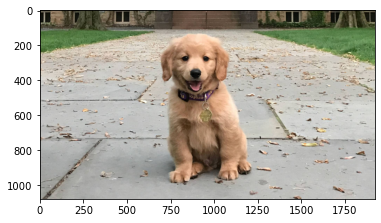

In [7]:
# imgplot = plt.imshow(img)
# plt.show()

In [8]:
# #reshape the image
# img.shape

(1080, 1920, 3)

In [10]:
# #resize the image using pillow library
# from PIL import Image
# img = Image.open('dog.jpg')
# img_resize = img.resize((200,200))

In [11]:
# print(img_resize)

<PIL.Image.Image image mode=RGB size=200x200 at 0x1E8A4C77550>


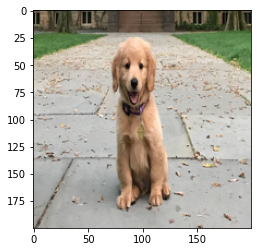

In [12]:
# #show the image
# imgplot = plt.imshow(img_resize)

In [3]:
# import cv2

In [4]:
# #read the image
# img = cv2.imread('dog.jpg')

In [5]:
# #convert the image to gray scale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
# #show the image
# cv2.imshow('gray', gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# #press q to close the window
# cv2.waitKey(1) & 0xFF == ord('q')

False

In [1]:
import tensorflow as tf 

# Display the version
print(tf.__version__)	 

# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model


2.15.0


In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 149s 1us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


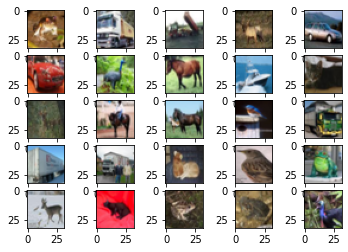

In [4]:
#visualisation of the data
fig, ax = plt.subplots(5, 5)
k = 0
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(x_train[k])
        k += 1
plt.show()

In [5]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i, x)
model.summary()

number of classes: 10


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 1

In [6]:
#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
#fit the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)


Epoch 1/15


1563/1563 [==============================] - 103s 64ms/step - loss: 1.2826 - accuracy: 0.5599 - val_loss: 1.0086 - val_accuracy: 0.6488
Epoch 2/15
1563/1563 [==============================] - 109s 70ms/step - loss: 0.8334 - accuracy: 0.7123 - val_loss: 1.0427 - val_accuracy: 0.6702
Epoch 3/15
1563/1563 [==============================] - 109s 70ms/step - loss: 0.6889 - accuracy: 0.7637 - val_loss: 0.7233 - val_accuracy: 0.7582
Epoch 4/15
1563/1563 [==============================] - 116s 74ms/step - loss: 0.5757 - accuracy: 0.8025 - val_loss: 0.7284 - val_accuracy: 0.7675
Epoch 5/15
1563/1563 [==============================] - 119s 76ms/step - loss: 0.4970 - accuracy: 0.8291 - val_loss: 0.7018 - val_accuracy: 0.7748
Epoch 6/15
1563/1563 [==============================] - 114s 73ms/step - loss: 0.4167 - accuracy: 0.8571 - val_loss: 0.6838 - val_accuracy: 0.7877
Epoch 7/15
1563/1563 [==============================] - 117s 75ms/step - loss: 0.3589 - accuracy: 0.8765 - val_loss:

In [8]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 119s 75ms/step - loss: 0.6077 - accuracy: 0.8032 - val_loss: 0.5592 - val_accuracy: 0.8220
Epoch 2/50
1562/1562 [==============================] - 123s 79ms/step - loss: 0.5165 - accuracy: 0.8267 - val_loss: 0.5165 - val_accuracy: 0.8368
Epoch 3/50
1562/1562 [==============================] - 130s 83ms/step - loss: 0.4681 - accuracy: 0.8403 - val_loss: 0.5095 - val_accuracy: 0.8319
Epoch 4/50
1562/1562 [==============================] - 127s 82ms/step - loss: 0.4437 - accuracy: 0.8488 - val_loss: 0.4852 - val_accuracy: 0.8445
Epoch 5/50
1562/1562 [==============================] - 129s 83ms/step - loss: 0.4223 - accuracy: 0.8564 - val_loss: 0.4583 - val_accuracy: 0.8484
Epoch 6/50
1562/1562 [==============================] - 130s 83ms/step - loss: 0.4011 - accuracy: 0.8633 - val_loss: 0.6475 - val_accuracy: 0.7959
Epoch 7/50
1562/1562 [==============================] - 129s 83ms/step - loss: 0.3909 - accuracy: 0.8673 - val_loss: 0

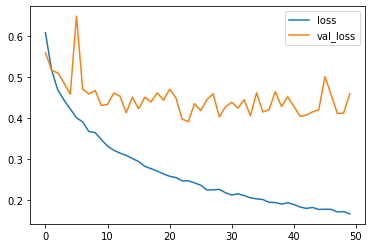

In [9]:
#plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

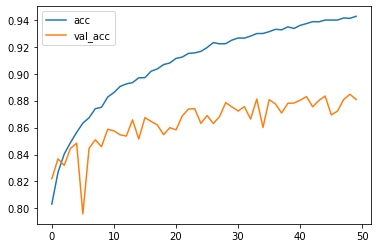

In [10]:
#plot the accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

1/1 [==============================] - 0s 323ms/step
[1.5118273e-04 4.5465093e-10 1.0284607e-04 5.2109940e-06 9.9967253e-01
 2.4279626e-07 1.5906060e-07 6.7853973e-05 5.8380287e-08 1.3653856e-10]
Predicted: deer True: deer


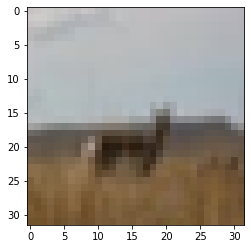

(1, 32, 32, 3)
1/1 [==============================] - 0s 39ms/step
[1.5118273e-04 4.5465093e-10 1.0284607e-04 5.2109940e-06 9.9967253e-01
 2.4279626e-07 1.5906060e-07 6.7853973e-05 5.8380287e-08 1.3653856e-10]
Predicted: deer True: deer


In [11]:
#label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()
#select an image
index = np.random.choice(x_test.shape[0])
x = x_test[index]
y = y_test[index]
#predict the image
p = model.predict(np.array([x]))[0]
print(p)
print("Predicted:", labels[np.argmax(p)], "True:", labels[y])
plt.imshow(x)
plt.show()
#reshape the image
x = np.expand_dims(x, axis=0)
#check the shape
print(x.shape)
#predict the image
p = model.predict(x)[0]
print(p)
print("Predicted:", labels[np.argmax(p)], "True:", labels[y])


1/1 [==============================] - 0s 28ms/step


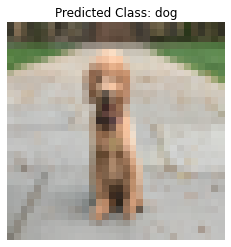

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load your custom image
custom_image = Image.open('dog.jpg')  # Replace 'path_to_your_image.jpg' with the actual path to your image

# Resize the image to match the input size of the model
custom_image = custom_image.resize((32, 32))

# Convert the image to a numpy array
custom_image = np.array(custom_image)

# Normalize the image
custom_image = custom_image / 255.0

# Reshape the image to match the input shape of the model
custom_image = np.expand_dims(custom_image, axis=0)

# Make predictions on the custom image
predictions = model.predict(custom_image)

# Get the predicted class label
predicted_class = np.argmax(predictions[0])

# Get the corresponding class name
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class_name = class_names[predicted_class]

# Display the custom image and the predicted class
plt.imshow(custom_image[0])
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()


In [13]:
# Save the model
model.save('cifar10_model.h5')

c:\Users\Dell\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
